In [1]:
!pip install qiskit ipywidgets
!pip install qiskit qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=94078b60966407e06cb3bc400ef07c15c7e5c61df8e18b6ecda9934902144184
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178bee

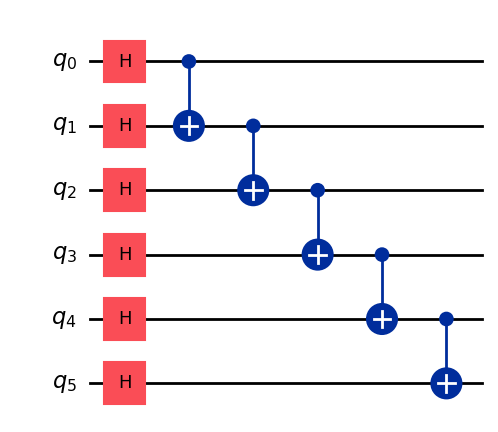

In [ ]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(6)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.h(4)
qc.h(5)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)
qc.cx(3,4)
qc.cx(4,5)
qc.draw(output='mpl')

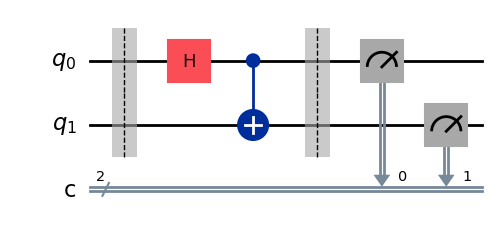

In [ ]:
from qiskit import QuantumCircuit as QC
# The Circuit
q_bell=QC(2,2)
q_bell.barrier()
q_bell.h(0)
q_bell.cx(0,1)
q_bell.barrier()
q_bell.measure([0,1],[0,1])
q_bell.draw(output='mpl',plot_barriers=True)



{'00': 499965, '11': 500035}


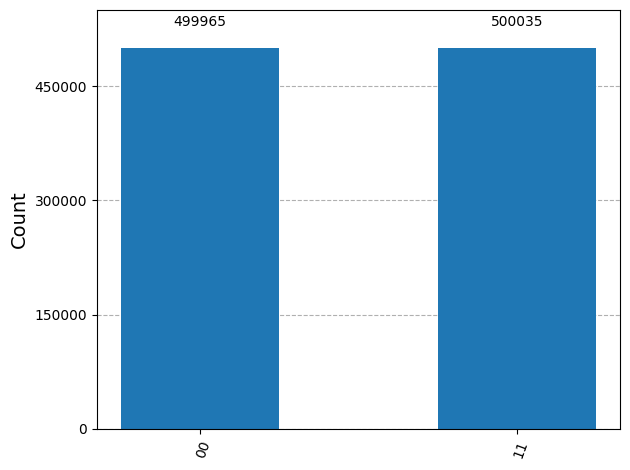

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram as hist
from qiskit.result import marginal_distribution
from numpy import pi
import numpy as np

# Hitogram of Probabilities

simulation = AerSimulator(shots=1e6).run(q_bell).result()
numerical_result = simulation.get_counts()
print(numerical_result)
display(hist(numerical_result))

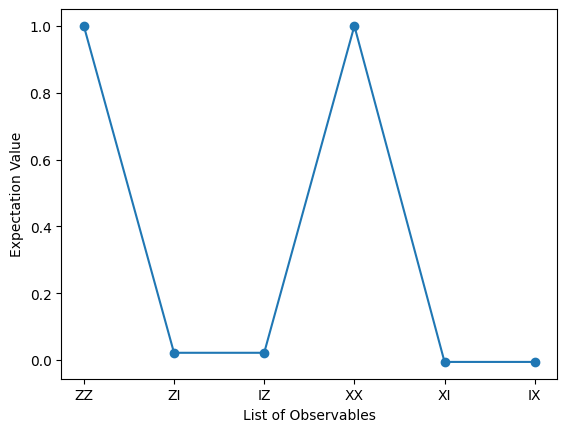

In [ ]:
from qiskit.quantum_info import Pauli
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Estimator
import matplotlib.pyplot as plt

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.draw(output='mpl')

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
ob_list = [ZZ, ZI, IZ, XX, XI, IX]

estimator = Estimator()
job = estimator.run([qc] * len(ob_list), ob_list)
job.result()


data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('List of Observables')
plt.ylabel('Expectation Value')
plt.show()

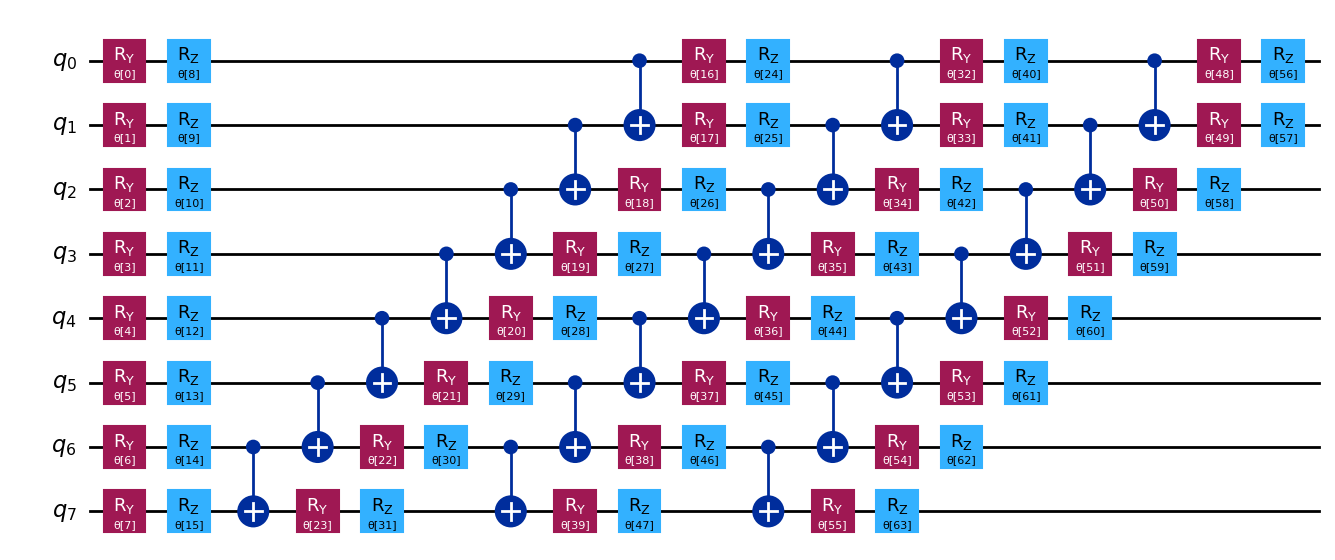

In [ ]:
from qiskit.circuit.library import efficient_su2

n_qubits = 8
circuit = efficient_su2(n_qubits)
circuit.draw("mpl")

In [ ]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator

observable = SparsePauliOp("Z" * n_qubits)
params = [0.1] * circuit.num_parameters

exact_estimator = Estimator()
# The circuit needs to be transpiled to the AerSimulator target
pass_manager = generate_preset_pass_manager(3, AerSimulator())
isa_circuit = pass_manager.run(circuit)
pub = (isa_circuit, observable, params)
job = exact_estimator.run([pub])
result = job.result()
pub_result = result[0]
exact_value = float(pub_result.data.evs)
exact_value

0.8870140234256602

In [ ]:
from qiskit import QuantumCircuit
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [ ]:
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

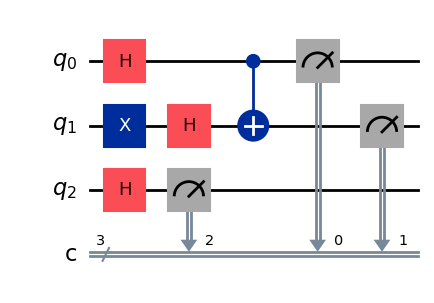

In [ ]:
# Matplotlib drawing
circuit.draw(output="mpl")


Bit Flip Code
----------------
RESULT:  {'0': 1000000}


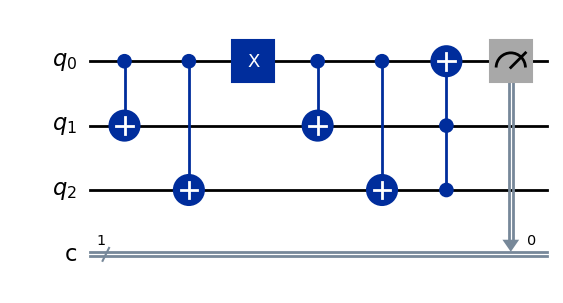

In [ ]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator

print('\nBit Flip Code')
print('----------------')


backend = AerSimulator() # Using local Aer simulator

q = QuantumRegister(3,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.x(q[0]) #Add this to simulate a bit flip error
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])
circuit.ccx(q[2],q[1],q[0])
circuit.measure(q[0],c[0])


result = backend.run(circuit,shots=1e6).result()
counts = result.get_counts(circuit)
print('RESULT: ',counts) # Print result
circuit.draw('mpl') # Draw circuit
